## Supplementary figures of Alaska

In [2]:
### load module
%matplotlib notebook
#import instaseis
import numpy as np
import matplotlib.pyplot as plt
import h5py
#import obspy
# from obspy import read
# from obspy.taup import TauPyModel as taup
# from obspy.taup.taup_geo import calc_dist_azi as calc_dist_azi
# from obspy.clients.fdsn import Client
# from obspy.signal.cross_correlation import correlate
# from obspy.signal.cross_correlation import xcorr_max
import pandas as pd
# import gridspec as gridspec

# import seissolxdmf 

from pythonXdmfReader.pythonXdmfReader import *
import pyproj
import scipy.io as sio
import matplotlib.tri as tri
# from mpl_toolkits.basemap import Basemap
from scipy import spatial
from netCDF4 import Dataset

import seaborn as sns

c_blue=['#2878B5','#9AC9DB'];
c_red=['#C82423','#F8AC8C','#FF8884'];
c_gre=['#96C37D','#8ECFC9'];
c_pur=['#8B8EFE','#C497B2'];

colors2=sns.color_palette("rocket",8);
print('load modulus')

# setup projection, load surface static GPS displacement

lla = pyproj.Proj(proj='latlong', ellps='WGS84', datum='WGS84')
myproj = pyproj.Proj( init='EPSG:5936',ellps='WGS84', datum='WGS84')

# xdmfFilename = foldername + modelname+'-surface.xdmf
gpsfolder='GPS/'
stall = np.loadtxt(gpsfolder+'/gnss_station2.txt')
staxyz = pyproj.transform(lla, myproj, stall[:,0],stall[:,1], stall[:,1], radians=False)

# stall2 = np.loadtxt('vno_stations2.dat')
# staxyz2= pyproj.transform(lla, myproj, stall2[:,1],stall2[:,0], stall2[:,1], radians=False)

## plot mapview of GPS records
coastf = 'coastline/alaska.mat'
coast = sio.loadmat(coastf)

hypoll = np.loadtxt('hypocenters/hypocenters.dat')
hypoxyz =  pyproj.transform(lla, myproj,hypoll[:,0],hypoll[:,1],radians=False)

trch = np.loadtxt('GMT/trench_ala.gmt',skiprows=1)


ModuleNotFoundError: No module named 'pythonXdmfReader.pythonXdmfReader'; 'pythonXdmfReader' is not a package

In [ ]:
fnet = Dataset('Kinematic/2021_Chignik_FFM_slip_grd.nc','r')
# print(fnet.variables)
lon_2022 = fnet['lon']
lat_2022 = fnet['lat']
slip_2022 = fnet['z'][:,:]

data = sio.loadmat('Kinematic/usgs_slip.mat')
lon_usgs= data['data']['lon'][0,0]
lat_usgs= data['data']['lat'][0,0]
slip_usgs= data['data']['slip'][0,0]
# print(slip_2022.shape)


c1 = np.loadtxt('Elliott2022/contour_1.txt')
c2 = np.loadtxt('Elliott2022/contour_2.txt')
c3 = np.loadtxt('Elliott2022/contour_3.txt')
c4 = np.loadtxt('Elliott2022/contour_4.txt')
c5 = np.loadtxt('Elliott2022/contour_5.txt')

hypo2 = np.loadtxt('hypocenters/hypocenters2.dat')
hypoll = np.loadtxt('hypocenters/hypocenters.dat')
hypoll4 = np.loadtxt('hypocenters/hypocenters4.dat')

# mfile='STF_usgs.txt'
mfile='mr_2.dat' # new/corrected USGS function

fin2 = open(mfile,'r')
mr = np.loadtxt(fin2)

fin3 = open('STF_elliott.txt','r')
mr3 = np.loadtxt(fin3)

fin4 = open('STF_chen.txt','r')
mr4 = np.loadtxt(fin4,delimiter=',')

fin5 = open('STF_ye.txt','r')
mr5 = np.loadtxt(fin5)


In [6]:
## plot Figure SI showing varing slip patch TP75e and TP75j

modelname = 'alkR057-TP64d'
foldername = '/import/deadlock-data/dli/Alaska2021/resultNew/'

modelname = 'tp37n222'
foldername = 'result1938/'

xdmfFilename = foldername + modelname+'-fault.xdmf'

ndt = ReadNdt(xdmfFilename)
xyz = ReadGeometry(xdmfFilename)
connect = ReadConnect(xdmfFilename)

flonlat =  pyproj.transform(myproj,lla,xyz[:,0],xyz[:,1],radians=False)
triang = tri.Triangulation(flonlat[0],flonlat[1],connect)

# fin = open(foldername + modelname+'-EnF_0t-all.dat','r')
# enf = np.loadtxt(fin,comments='#',skiprows=1)
# M0 = np.trapz(enf[:,1], x=enf[:,0])
# mag  = 2/3*np.log10(M0)-6.07


asl= LoadData(xdmfFilename,'ASl',connect.shape[0],idt=ndt-1,oneDtMem=True,firstElement=-1)
# tmp= LoadData(xdmfFilename,'Tmp',connect.shape[0],idt=ndt-1,oneDtMem=True,firstElement=-1)
# pf = LoadData(xdmfFilename,'P_f',connect.shape[0],idt=ndt-1,oneDtMem=True,firstElement=-1)
# vr = LoadData(xdmfFilename,'Vr',connect.shape[0],idt=ndt-1,oneDtMem=True,firstElement=-1)

# pn0 = LoadData(xdmfFilename,'Pn0',connect.shape[0],idt=ndt-1,oneDtMem=True,firstElement=-1)
# td0 = LoadData(xdmfFilename,'Td0',connect.shape[0],idt=0,oneDtMem=True,firstElement=-1)
# td1 = LoadData(xdmfFilename,'Td0',connect.shape[0],idt=ndt-1,oneDtMem=True,firstElement=-1)


/tmp/ipykernel_4061573/115178510.py:15: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  flonlat =  pyproj.transform(myproj,lla,xyz[:,0],xyz[:,1],radians=False)


<IPython.core.display.Javascript object>


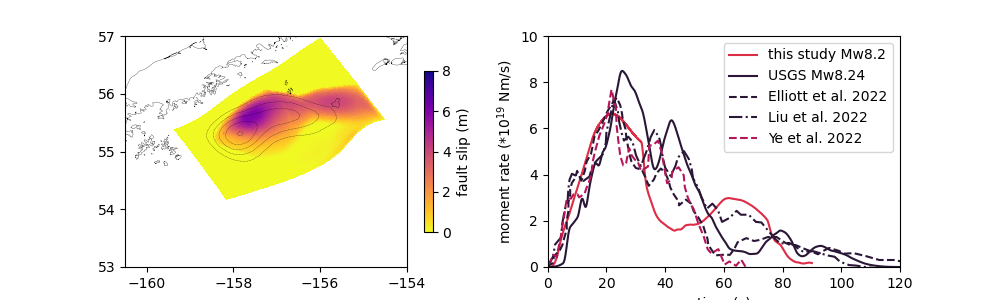

In [13]:
## plot Figure SI showing varing slip patch TP75e and TP75j

fig,([ax0,ax1])=plt.subplots(nrows=1,ncols=2,figsize=(10,3))

#ax0.set_title('Mapview of Td0')
sc = ax0.tripcolor(triang,asl[0],cmap='plasma_r',shading='flat',vmin=0.0,vmax=8.0)
# ax0.plot(hypoll[5,0],hypoll[5,1],'*',color='red',markersize=4) # nuc
# ax0.plot(hypoll[0,0],hypoll[0,1],'*',color='k',markersize=5) # usgs
ax0.plot(c1[:,0],c1[:,1],'--k',linewidth=0.2)
ax0.plot(c2[:,0],c2[:,1],'--k',linewidth=0.2)
ax0.plot(c3[:,0],c3[:,1],'--k',linewidth=0.2)
ax0.plot(c4[:,0],c4[:,1],'--k',linewidth=0.2)
ax0.plot(c5[:,0],c5[:,1],'--k',linewidth=0.2)

# ax0.plot(hypo2[0,0],hypo2[0,1],'*',color='blue',markersize=5)

ax0.plot(coast['data'][:,0],coast['data'][:,1],'-k',linewidth=0.2)
ax0.set(xlim=(-160.5, -154),ylim=(53.5,57))
# ax0.set_title('Simulation')
ax0.set_yticks([53,54,55,56,57])
# ax0.set_aspect(1)
cl = fig.colorbar(sc,ax=ax0,shrink=0.7)
cl.set_label('fault slip (m)')


## compare souce time function

# old previous moment rate output


ax1.plot(enf[:,0],enf[:,1]/1e19,'-',color=colors2[4])   # from MPa*m**2/s to dyne-cm/s
ax1.plot(mr[:,0],mr[:,1]/1e19,'-',color=colors2[0]) # normalized by 1e19
ax1.plot(mr3[:,0],mr3[:,1],'--',color=colors2[0])
ax1.plot(mr4[:,0],mr4[:,1],'-.',color=colors2[0])
ax1.plot(mr5[:,0],mr5[:,1],'--',color=colors2[3])

ax1.legend(['this study'+ ' Mw'+str(round(mag,2)),'USGS Mw8.24','Elliott et al. 2022','Liu et al. 2022','Ye et al. 2022'])

ax1.set_xlabel('time (s)')
ax1.set_ylabel('moment rate (*$10^{19}$ Nm/s)')
ax1.set(xlim=(0,120),ylim=(0,10))


outname = modelname+'-slip3-mt.png'
plt.savefig(outname,dpi=300,transparent=False)

In [31]:
# load rupture area of 1939 event
rup1938 = np.loadtxt('rupture1938.txt')

<IPython.core.display.Javascript object>


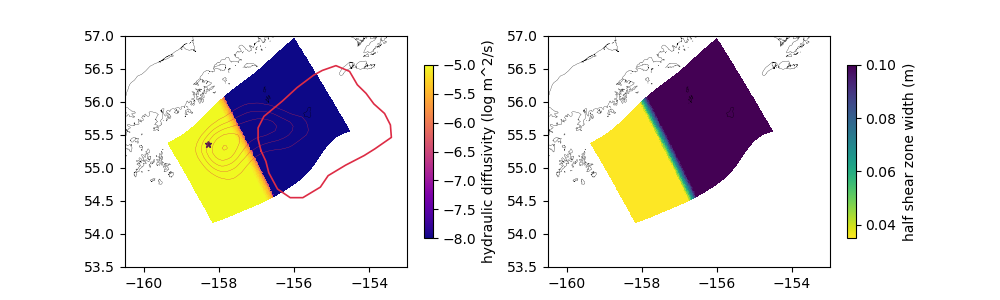

In [33]:
# SI figure showing the distribution of TP parameters
modelname = 'tp72f'

centers = (xyz[connect[:,0]] + xyz[connect[:,1]] + xyz[connect[:,2]])/3.

ac = 2.85
bc = 1
cc = -2.05e6
yx = ac * centers[:,0]+ bc*centers[:,1] + cc

alphy = np.zeros(yx.shape)+1e-5
wh = np.zeros(yx.shape)+0.035

# dd = np.where(yx<0.05e6)
# alphy[dd] = 1e-8
# wh[dd] = 0.1

dd = np.where(yx>0.3e6)
alphy[dd] = 1e-8
wh[dd] = 0.1

dd = np.where((yx<0.3e6) &( yx>0.25e6))
hy1 = 1e-5
hy2 = 1e-8
wh1 = 0.035
wh2 = 0.1
alphy[dd] = hy1 + (hy2-hy1)*(yx[dd]-0.25e6)/(0.3e6-0.25e6)
wh[dd] = wh1 + (wh2-wh1)*(yx[dd]-0.25e6)/(0.3e6-0.25e6)


fig,([ax0,ax1]) = plt.subplots(ncols=2,nrows=1,figsize=(10,3))

sc = ax0.tripcolor(triang,np.log10(alphy),cmap='plasma',shading='flat');
ax0.plot(coast['data'][:,0],coast['data'][:,1],'-k',linewidth=0.2)
ax0.set(xlim=(-160.5, -153),ylim=(53.5,57))
cl = fig.colorbar(sc,ax=ax0,shrink=0.75)

cl.set_label('hydraulic diffusivity (log m^2/s)')

ax0.plot(hypoll[4,0],hypoll[4,1],'*',markersize=5,color=colors2[1])

ax0.plot(rup1938[:,0],rup1938[:,1],color=colors2[4],linewidth=1.2)
ax0.plot(c1[:,0],c1[:,1],color=colors2[4],linewidth=0.2)
ax0.plot(c2[:,0],c2[:,1],color=colors2[4],linewidth=0.2)
ax0.plot(c3[:,0],c3[:,1],color=colors2[4],linewidth=0.2)
ax0.plot(c4[:,0],c4[:,1],color=colors2[4],linewidth=0.2)
ax0.plot(c5[:,0],c5[:,1],color=colors2[4],linewidth=0.2)


sc = ax1.tripcolor(triang,wh,cmap='viridis_r',shading='flat');
ax1.plot(coast['data'][:,0],coast['data'][:,1],'-k',linewidth=0.2)
ax1.set(xlim=(-160.5, -153),ylim=(53.5,57))
cl = fig.colorbar(sc,ax=ax1,shrink=0.75)

cl.set_label('half shear zone width (m)')


outname = './'+ modelname +'-tp.png'
plt.savefig(outname,dpi=300,transparent=False)

<IPython.core.display.Javascript object>


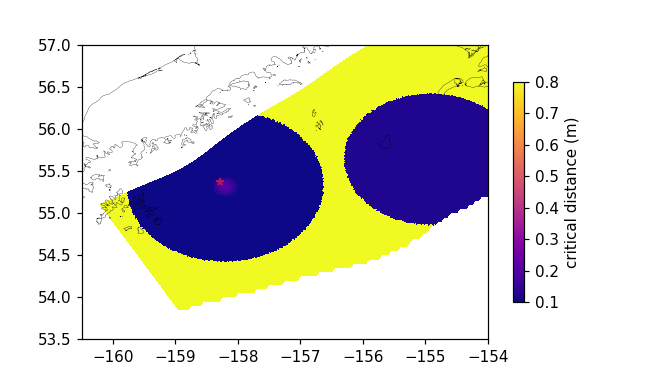

In [17]:
## plot parameters d_c

centers = (xyz[connect[:,0]] + xyz[connect[:,1]] + xyz[connect[:,2]])/3.

r = np.sqrt(np.power(centers[:,0]-1433876.0,2.0)+np.power(centers[:,1]+1927693.0,2.0)+np.power(centers[:,2]+30786.0,2.0));
r_crit0 = 5000.0;
r_crit = 10000.0;
a = (r-r_crit0)/r_crit

r2 = np.sqrt(np.power(centers[:,0]-1.5519e6,2.0)+np.power(centers[:,1]+1.92e6,2.0)+np.power(centers[:,2]+18000.0,2.0));
r_crit0 = 5000.0;
r_crit = 10000.0;
a2 = (r2-r_crit0)/r_crit


r3 = np.sqrt(np.power(centers[:,0]-1.663413e6,2.0)+np.power(centers[:,1]+1.9145e6,2.0)+np.power(centers[:,2]+15673.0,2.0));


alpha1 = np.where(a<1.0,a,1.0)
alpha = np.where(alpha1>0.0,alpha1,0.0)


rs_l0 = 0.2-0.1*alpha
dd = np.where(r>110000.0)
dd2 = np.where(r2<50000.0)
dd3 = np.where(r3<95000.0)


rs_l0[dd] = 0.8 
rs_l0[dd3] = 0.12
# rs_l0[dd2] = 0.1 

fig,ax0 = plt.subplots(ncols=1,nrows=1,figsize=(6,3.5))

sc = ax0.tripcolor(triang,rs_l0,cmap='plasma',shading='flat');

ax0.plot(coast['data'][:,0],coast['data'][:,1],'-k',linewidth=0.2)
ax0.set(xlim=(-160.5, -154),ylim=(53.5,57))
cl = fig.colorbar(sc,ax=ax0,shrink=0.75)
cl.set_label('critical distance (m)')

ax0.plot(hypoll[4,0],hypoll[4,1],'*',markersize=5,color=colors2[3])

# modelname = 'alkR057-tp75g'

outname = './'+ modelname +'-dc-circ2.png'
plt.savefig(outname,dpi=300,transparent=False)

In [ ]:
# plot residual

fig,([ax0,ax1])=plt.subplots(nrows=1,ncols=2,figsize=(10,3))

ax0.plot(hypoll[0,0],hypoll[0,1],'*',markersize=5)

ax0.plot(coast['data'][:,0],coast['data'][:,1],'-k',linewidth=0.2)
ax0.set(xlim=(-160.5, -154),ylim=(53.5,57))
ax0.set_yticks([53,54,55,56,57])

sc = ax0.tripcolor(triang,-td1[0]/pn0[0],cmap='inferno_r',shading='flat',vmin=0.0,vmax=0.70)
cl = fig.colorbar(sc,ax=ax0,shrink=0.7)
cl.set_label('shear-to-normal ratio')

sc = ax1.tripcolor(triang,(td0[0]-td1[0])/1e6,cmap='magma_r',shading='flat',vmin=0.0,vmax=10.0)
cl = fig.colorbar(sc,ax=ax1)
cl.set_label('stress drop (MPa)')

ax1.plot(hypoll[0,0],hypoll[0,1],'*k',markersize=5)

ax1.plot(coast['data'][:,0],coast['data'][:,1],'-k',linewidth=0.2)
ax1.set(xlim=(-160.5, -154),ylim=(53.5,57))
ax1.set_yticks([53,54,55,56,57])

outname = modelname+'-td-sdrop.png'
plt.savefig(outname,dpi=300,transparent=False)

In [ ]:
fsta=np.loadtxt('faultreceivers/faultreceiver1.txt')
fstaxyz =  pyproj.transform(myproj,lla,fsta[:,0],fsta[:,1],radians=False)
temp0 = 483.15

fig,([ax0,ax1])=plt.subplots(nrows=1,ncols=2,figsize=(9,3))

#ax0.set_title('Mapview of Td0')
ax0.plot(fstaxyz[0][1],fstaxyz[1][1],'*k',markersize=3)
ax0.plot(fstaxyz[0][3],fstaxyz[1][3],'*k',markersize=3)
ax0.plot(fstaxyz[0][0],fstaxyz[1][0],'*k',markersize=3)

# ax0.plot(hypoll[4,0],hypoll[4,1],'*',color=colors2[2],markersize=5)
ax0.plot(coast['data'][:,0],coast['data'][:,1],'-k',linewidth=0.3)
ax0.set(xlim=(-160.5, -154),ylim=(53.5,57))
ax0.set_yticks([53,54,55,56,57])

sc = ax0.tripcolor(triang,tmp[0]-temp0,cmap='plasma_r',shading='flat',vmin=0.0,vmax=300.0)
cl = fig.colorbar(sc,ax=ax0,shrink=0.7)
cl.set_label('temperature increase (K)')

sc = ax1.tripcolor(triang,-pf[0]/1e6,cmap='viridis_r',shading='flat',vmin=0.0,vmax=15.0)
cl = fig.colorbar(sc,ax=ax1,shrink=0.7)
cl.set_label('pore pressure increase (MPa)')
# ax1.plot(hypoll[4,0],hypoll[4,1],'*',markersize=5,color=colors2[2])
ax1.plot(coast['data'][:,0],coast['data'][:,1],'-k',linewidth=0.3)
ax1.set(xlim=(-160.5, -154),ylim=(53.5,57))
ax1.set_yticks([53,54,55,56,57])

outname = modelname+'-pf-tmp2.png'
plt.savefig(outname,dpi=200,transparent=False)

In [ ]:
fig,ax1=plt.subplots(nrows=1,ncols=1,figsize=(4,3))

sc = ax1.tripcolor(triang,vr[0],cmap='viridis_r',shading='flat',vmin=0.0,vmax=4000.0)
cl = fig.colorbar(sc,ax=ax1)
cl.set_label('rupture velocity (m/s)')
ax1.plot(hypoll[0,0],hypoll[0,1],'*',markersize=5,color='white')

ax1.plot(coast['data'][:,0],coast['data'][:,1],'-k',linewidth=0.3)
ax1.set(xlim=(-160.5, -154),ylim=(53.5,57))
ax1.set_yticks([53,54,55,56,57])

outname = modelname+'-vr.png'
plt.savefig(outname,dpi=300,transparent=False)

<IPython.core.display.Javascript object>


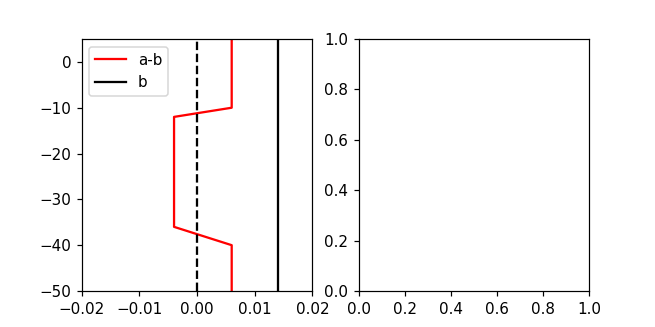

In [46]:
#  -1e10: [0.02]
#             10e3:  [0.02]
#             12e3: [0.01]
#             36e3: [0.01]
#             40e3: [0.02]
#             10e10: [0.02]


idep = np.array([-10,10,12,36,40,100]);
avar =np.array([0.02,0.02,0.01,0.01,0.02,0.02]);
bvar = np.zeros(abvar.shape)+0.014;

fig,([ax0,ax1])=plt.subplots(nrows=1,ncols=2,figsize=(6,3))

#ax0.set_title('Mapview of Td0')
ax0.plot(avar-bvar,-idep,'-r',markersize=2)
ax0.plot(bvar,-idep,'-k',markersize=2)
ax0.plot([0.0,0.0],[-50,50],'--k')
ax0.set(xlim=(-0.02,0.02),ylim=(-50,5))
ax0.legend(['a-b','b'])

outname = modelname+'-ab.png'
plt.savefig(outname,dpi=300,transparent=False)